<a href="https://www.kaggle.com/code/rajarshimanna/eda-criminal-activities-in-india?scriptVersionId=128569575" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Loading the initial data

In [2]:
total_crimes_city = "/kaggle/input/criminal-activities-in-india/total_crimes/IPC_crimes_(City-wise)_2019-2021.csv"
total_crimes_state_ut = "/kaggle/input/criminal-activities-in-india/total_crimes/IPC_crimes_(State-UT-wise)_2019-2021.csv"
total_complaints_received = "/kaggle/input/criminal-activities-in-india/total_crimes/Total_Complaints_Received_2019-2021.csv"
crime_against_children = "/kaggle/input/criminal-activities-in-india/crime_women_children/crime_against_children_(State-UT-wise)_2019-2021.csv"
crime_agaist_women = "/kaggle/input/criminal-activities-in-india/crime_women_children/crime_against_women_(State-UT-wise)_2019-2021.csv"
murder_cases = "/kaggle/input/criminal-activities-in-india/murder_cases/murder_cases_(State-UT-wise)_2019-2021.csv"
victims_of_murder = "/kaggle/input/criminal-activities-in-india/murder_cases/victims_of_murder_(Gender_Age_Group-wise)_2021.csv"
kidnapping_abduction = "/kaggle/input/criminal-activities-in-india/violent_crimes/kidnapping_abduction_(State-UT-wise)_2019-2021.csv"
violent_crimes = "/kaggle/input/criminal-activities-in-india/violent_crimes/violent_crimes_(State-UT-wise)_2021.csv"

# IPC Crimes (State-UT wise) analysis

In [3]:
df = pd.read_csv(total_crimes_state_ut)

In [4]:
state_abbr = {
  'Andhra Pradesh': 'AP',
  'Arunachal Pradesh': 'AR',
  'Assam': 'AS',
  'Bihar': 'BR',
  'Chhattisgarh': 'CG',
  'Goa': 'GA',
  'Gujarat': 'GJ',
  'Haryana': 'HR',
  'Himachal Pradesh': 'HP',
  'Jharkhand': 'JH',
  'Karnataka': 'KA',
  'Kerala': 'KL',
  'Madhya Pradesh': 'MP',
  'Maharashtra': 'MH',
  'Manipur': 'MN',
  'Meghalaya': 'ML',
  'Mizoram': 'MZ',
  'Nagaland': 'NL',
  'Odisha': 'OD',
  'Punjab': 'PB',
  'Rajasthan': 'RJ',
  'Sikkim': 'SK',
  'Tamil Nadu': 'TN',
  'Telangana': 'TS',
  'Tripura': 'TR',
  'Uttar Pradesh': 'UP',
  'Uttarakhand': 'UK',
  'West Bengal': 'WB',
  'A&N Islands': 'AN',
  'Chandigarh': 'CH',
  'D&N Haveli and Daman & Diu+': 'DD',
  'Delhi': 'DL',
  'Jammu & Kashmir*': 'JK',
  'Ladakh @': 'LH',
  'Lakshadweep': 'LD',
  'Puducherry': 'PY'
}
df['NameAbbr'] = df['Name'].map(state_abbr)

### Total crimes of all States and UTs

In [5]:
df = df.replace('-', np.nan).dropna()
df['2019'] = df['2019'].astype('int64')

In [6]:
crimes_2019 = df['2019'].sum()
crimes_2020 = df['2020'].sum()
crimes_2021 = df['2021'].sum()

In [7]:
total_crimes = crimes_2019 + crimes_2020 + crimes_2021

> #### *****The total number of crimes that took place between 2019 to 2021 is: 11,142,407.*****

### Total crimes year wise

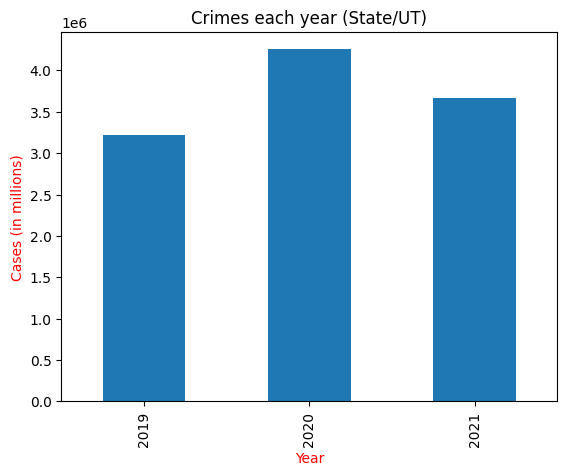

In [8]:
crimes_df = pd.Series([crimes_2019, crimes_2020, crimes_2021], ['2019', '2020', '2021'])

crimes_df.plot(kind='bar')

plt.xlabel("Year", color = "red")
plt.ylabel("Cases (in millions)", color = "red")
plt.title("Crimes each year (State/UT)")

plt.show()

> #### *****Most number of crimes took place in the year 2020, followed by the year 2021 and then 2019.*****

### States which have the highest crimes among other states

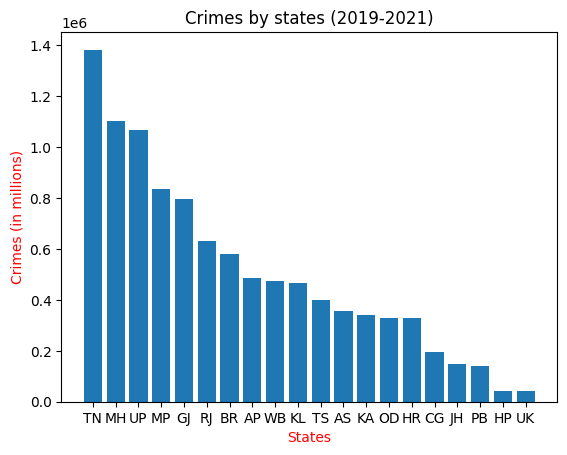

In [9]:
df['TotalCrime'] = (df['2019'] + df['2020'] + df['2021'])
state = df[df['State/UT'] == "State"].sort_values(by = "TotalCrime", ascending = False)
plt.bar(state['NameAbbr'][:20], state['TotalCrime'][:20])
plt.xlabel("States", color = "red")
plt.ylabel("Crimes (in millions)", color = "red")
plt.title("Crimes by states (2019-2021)")
plt.show()

> #### *****Tamil Nadu constituted highest number of crimes, followed by Maharashtra on second, Uttar Pradesh on third, Madhya Pradesh on fourth and Gujarat on fifth highest. Uttrakhand ranks 20th.*****

### UTs which have the highest crime rates among other UTs

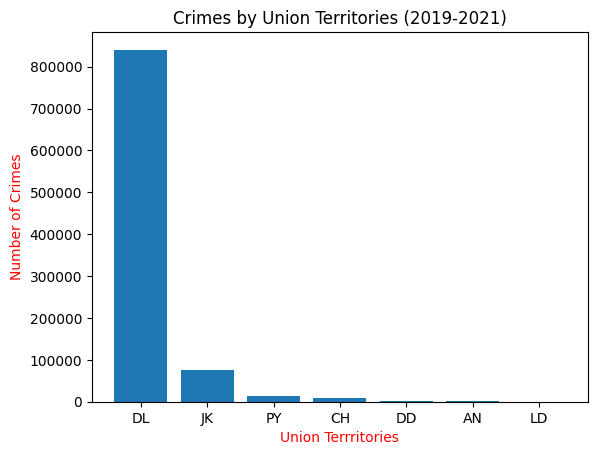

In [10]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalCrime", ascending = False)
plt.bar(ut['NameAbbr'][:20], ut['TotalCrime'][:20])
plt.xlabel("Union Terrritories", color = "red")
plt.ylabel("Number of Crimes", color = "red")
plt.title("Crimes by Union Territories (2019-2021)")
plt.show()

> #### *****Among Union Territories, Delhi is far ahead on number of crimes, followed by a distant second and third highest Jammu & Kashmir and Pondicherry respectively.*****

### Crimes by top 10 states year by year

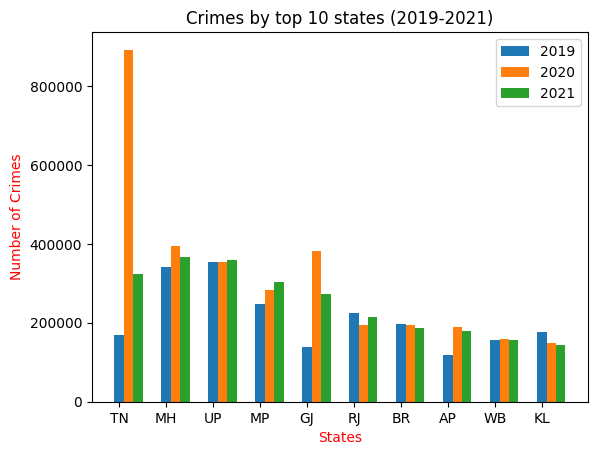

In [11]:
state = df[df['State/UT'] == "State"].sort_values(by = "TotalCrime", ascending = False)

xpos = np.arange(len(state['NameAbbr'][:10]))
plt.xticks(xpos, state['NameAbbr'][:10])
plt.bar(xpos, state['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, state['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, state['2021'][:10], label = "2021", width = 0.2)

plt.xlabel("States", color = "red")
plt.ylabel("Number of Crimes", color = "red")
plt.title("Crimes by top 10 states (2019-2021)")
plt.legend()
plt.show()

> #### *****Tamil Nadu saw a huge spike of crimes in the year 2020, while also having a significantly higher number of crimes in the following year than that of in 2019. Gujarat also saw a significant rise in crimes in the year 2020. Other states have fairly equal number of crimes in these three years.*****

### Crimes by top 10 UTs year by year

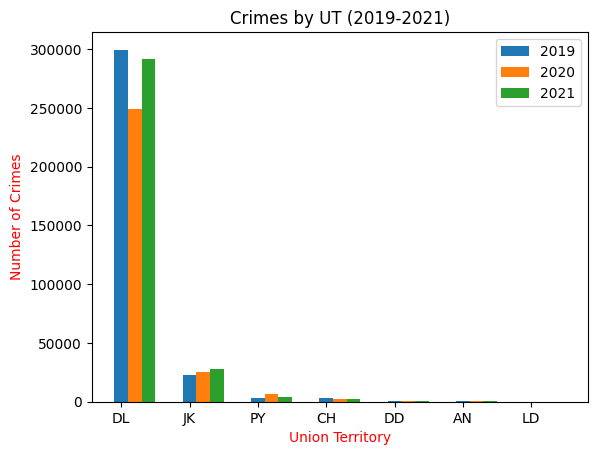

In [12]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalCrime", ascending = False)

xpos = np.arange(len(ut['NameAbbr'][:10]))
plt.xticks(xpos, ut['NameAbbr'][:10])
plt.bar(xpos, ut['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, ut['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, ut['2021'][:10], label = "2021", width = 0.2)


plt.xlabel("Union Territory", color = "red")
plt.ylabel("Number of Crimes", color = "red")
plt.title("Crimes by UT (2019-2021)")
plt.legend()
plt.show()

> #### *****Delhi saw a drop in the number of crimes in 2020 compared to 2019 and 2021, while for other union territories the number of crimes in these three year remained almost equal.*****

### Cognizable crime rates of top 20 State/UT

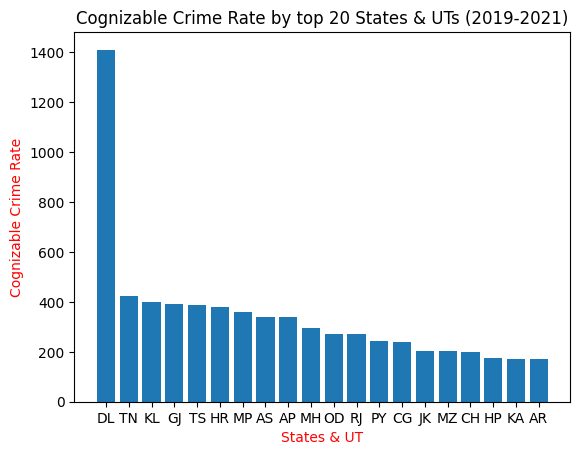

In [13]:
sort_by_czc = df.sort_values(by = "RateofCognizableCrimes", ascending = False)
plt.bar(sort_by_czc['NameAbbr'][:20], sort_by_czc['RateofCognizableCrimes'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Cognizable Crime Rate", color = "red")
plt.title("Cognizable Crime Rate by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****Delhi have an unsually high number of cognizable crime rate among all States and UTs, followed by Tamil Nadu.*****

### Charge sheeting rate by top 10 states and UTs

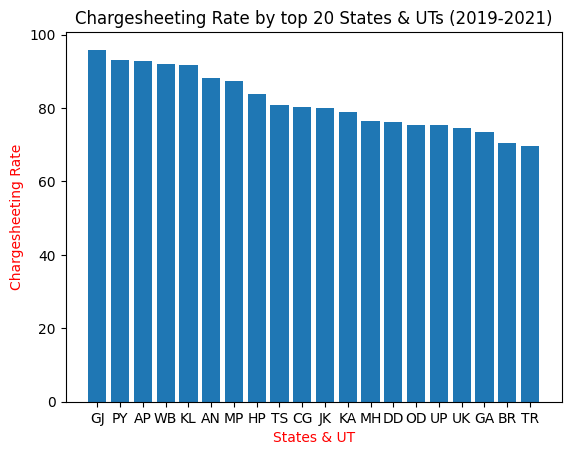

In [14]:
sort_by_charge_sheet_rate = df.sort_values(by = "ChargesSheetingRate", ascending = False)
plt.bar(sort_by_charge_sheet_rate['NameAbbr'][:20], sort_by_charge_sheet_rate['ChargesSheetingRate'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Chargesheeting Rate", color = "red")
plt.title("Chargesheeting Rate by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****Gujarat ranks first among top 20 States/UTs in terms of charge sheeting rate while Tripura ranks at 20th place*****

# IPC crimes (City wise) analysis

In [15]:
df = pd.read_csv(total_crimes_city)

In [16]:
df['TotalCrime'] = df['2019'] + df['2020'] + df['2021']

### Total number of crimes in all cities

In [17]:
crimes_2019 = df['2019'].sum()
crimes_2020 = df['2020'].sum()
crimes_2021 = df['2021'].sum()

In [18]:
total_crime = crimes_2019 + crimes_2020 + crimes_2021

> #### *****The total number of crimes committed in all the cities listed combined is: 676,655.*****

### Total crimes year wise

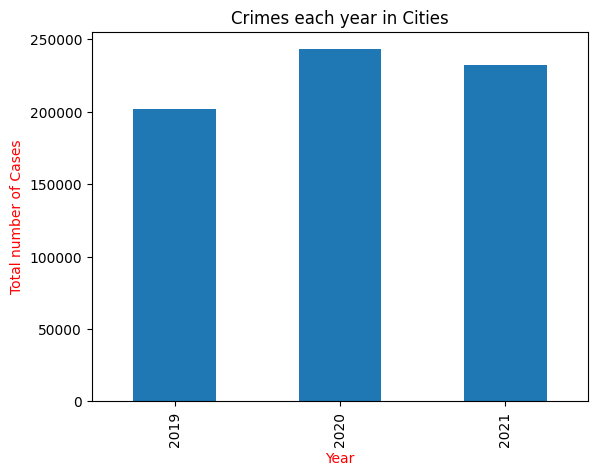

In [19]:
crimes_df = pd.Series([crimes_2019, crimes_2020, crimes_2021], ['2019', '2020', '2021'])

crimes_df.plot(kind='bar')

plt.xlabel("Year", color = "red")
plt.ylabel("Total number of Cases", color = "red")
plt.title("Crimes each year in Cities")

plt.show()

> #### *****In the year 2020 cities recorded the most number crimes, followed by 2021 and then in 2019 the least.*****

### Top 5 cities by total number of crimes

In [20]:
sort_by_total_crimes = df.sort_values(by = "TotalCrime", ascending = False)

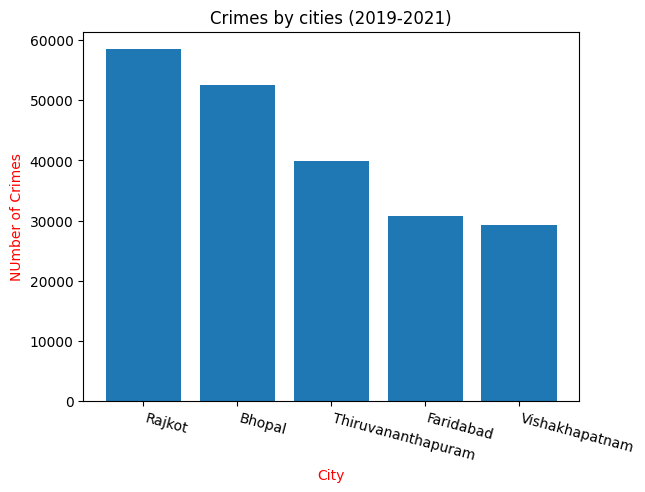

In [21]:
plt.bar(sort_by_total_crimes['City'][:5], sort_by_total_crimes['TotalCrime'][:5])
plt.xticks(rotation=-15, ha = 'left')
plt.xlabel("City", color = "red")
plt.ylabel("NUmber of Crimes", color = "red")
plt.title("Crimes by cities (2019-2021)")
plt.show()

> #### *****Rajkot has the highest number of crimes between 2019-2021, followed by Bhopal, Thiruvananthapuram, Faribad and Vishakhapatnam on 5th.*****

### Number of crimes by top 5 cities year by year

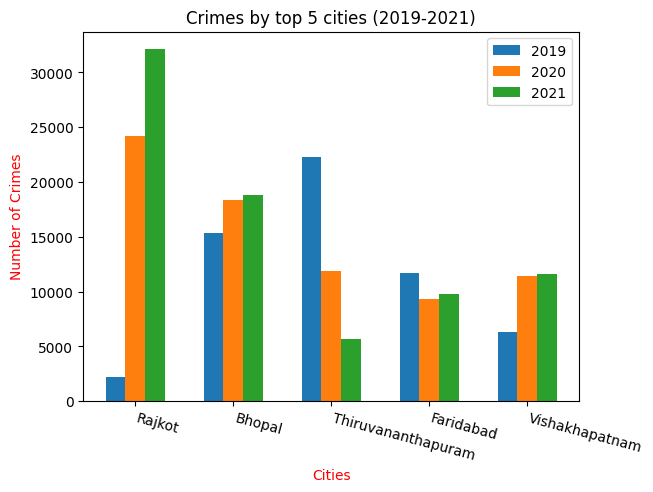

In [22]:
xpos = np.arange(len(sort_by_total_crimes['City'][:5]))
plt.xticks(xpos, sort_by_total_crimes['City'][:5], rotation=-15, ha = 'left')
plt.bar(xpos - 0.2, sort_by_total_crimes['2019'][:5], label = "2019", width = 0.2)
plt.bar(xpos, sort_by_total_crimes['2020'][:5], label = "2020", width = 0.2)
plt.bar(xpos + 0.2, sort_by_total_crimes['2021'][:5], label = "2021", width = 0.2)

plt.xlabel("Cities", color = "red")
plt.ylabel("Number of Crimes", color = "red")
plt.title("Crimes by top 5 cities (2019-2021)")
plt.legend()
plt.show()

> #### *****Among top 5 cities in total number of crimes, Rajkot have a large spikes in number of crimes from 2020 onwards. While Thiruvanathapuram saw large drops in number of cases from 2020 onwards. Other states had a quite uniform number of cases in these three years.*****

### Cognizable crime rates of top 5 cities in terms of number of crimes

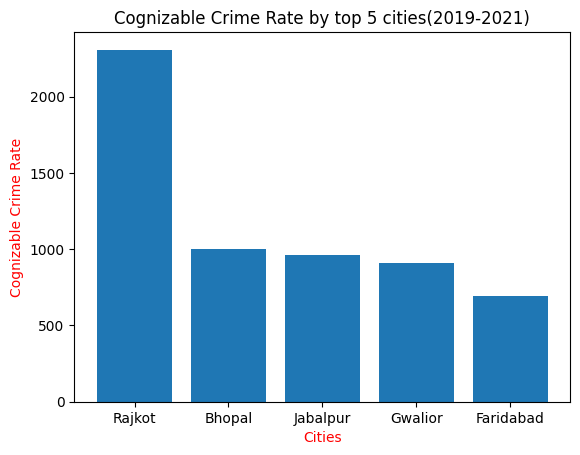

In [23]:
sort_by_czc = df.sort_values(by = "RateofCognizableCrimes", ascending = False)
plt.bar(sort_by_czc['City'][:5], sort_by_czc['RateofCognizableCrimes'][:5])
plt.xlabel("Cities", color = "red")
plt.ylabel("Cognizable Crime Rate", color = "red")
plt.title("Cognizable Crime Rate by top 5 cities(2019-2021)")
plt.show()

> #### *****Rajkot have the highest number of cognizable crime rates, followed by Bhoopal, Jabalpur, Gwalior and Faridabad in top 5.*****

### Charge sheeting rates of top 5 cities in terms of number of crimes

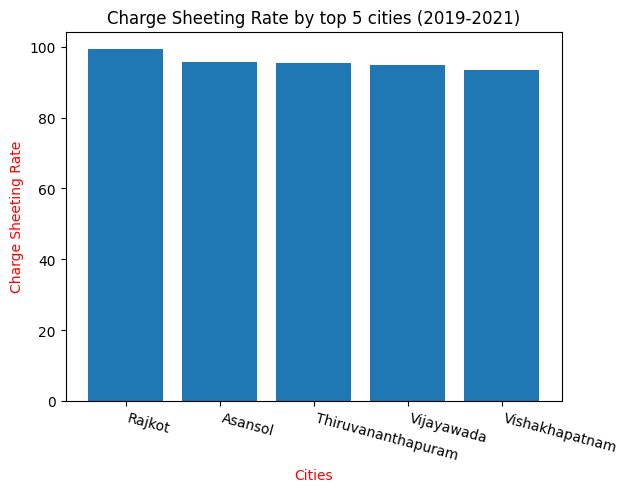

In [24]:
sort_by_cs = df.sort_values(by = "ChargesSheetingRate", ascending = False)
plt.bar(sort_by_cs['City'][:5], sort_by_cs['ChargesSheetingRate'][:5])
plt.xticks(rotation=-15, ha = 'left')
plt.xlabel("Cities", color = "red")
plt.ylabel("Charge Sheeting Rate", color = "red")
plt.title("Charge Sheeting Rate by top 5 cities (2019-2021)")
plt.show()

> #### *****Rajkot have the highest number of charge sheeting rate while Vishakhapatnam ranks 5th among top 5.*****

# Total complaint received analysis

In [25]:
df = pd.read_csv(total_complaints_received)

### Top 10 complaints received

In [26]:
sort_by_complaints = df.sort_values(by = "#ofComplaints", ascending = False)

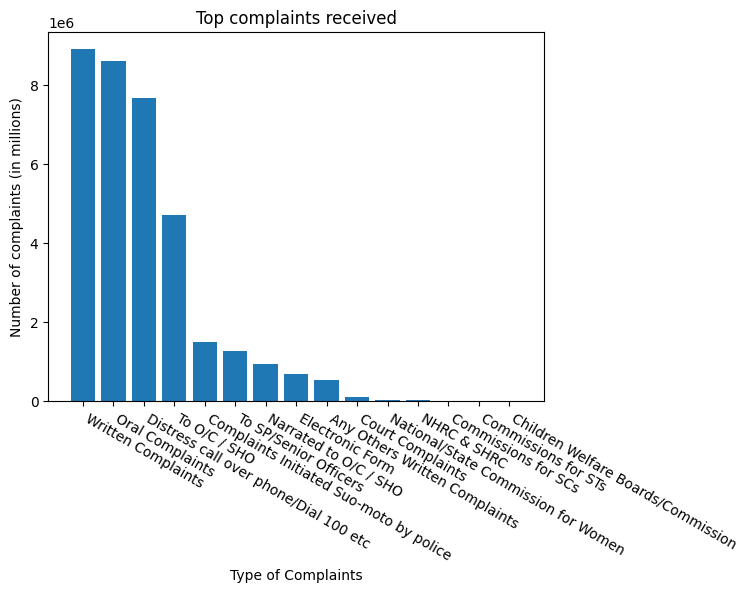

In [27]:
plt.bar(sort_by_complaints['TypeofComplaints'], sort_by_complaints['#ofComplaints'])

plt.xticks(rotation=-30, ha = 'left')
plt.ylabel("Number of complaints (in millions)")
plt.xlabel("Type of Complaints")
plt.title("Top complaints received")

plt.show()

> #### *****Among top 10 means of complaint received, Written Complaints, Oral Complaints and Distress call over phone/Dial 100 are the top 3 means.*****

### Top 10 FIRs received

In [28]:
sort_by_firs = df.sort_values(by = "#ofFIRs", ascending = False)

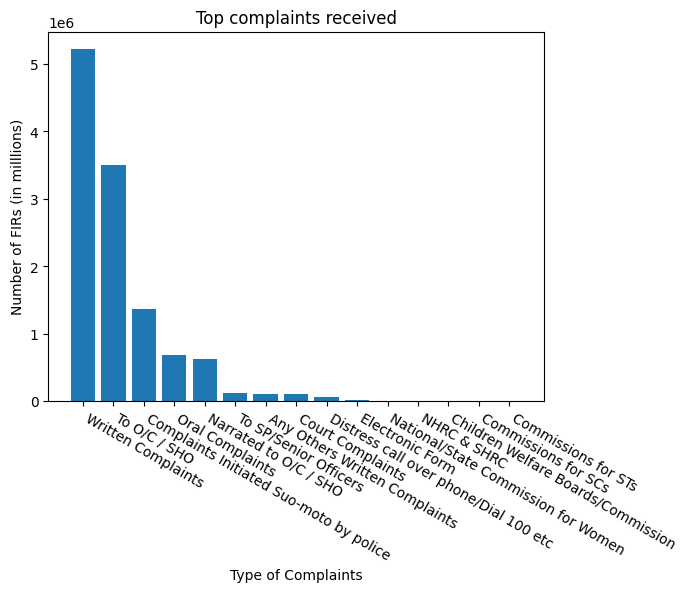

In [29]:
plt.bar(sort_by_firs['TypeofComplaints'], sort_by_firs['#ofFIRs'])

plt.xticks(rotation=-30, ha = 'left')
plt.ylabel("Number of FIRs (in milllions)")
plt.xlabel("Type of Complaints")
plt.title("Top complaints received")

plt.show()

> #### *****Among top 10 means of FIRs received, Written Complaints and To O/C / SHO are the most popular.*****

# Violent Crimes (State-UT wise) analysis

In [30]:
df = pd.read_csv(violent_crimes)
df['NameAbbr'] = df['Name'].map(state_abbr)

In [31]:
df = df.replace('-', np.nan).dropna()
df['2019'] = df['2019'].astype('int64')

### Total violent crimes of all States and UTs

In [32]:
crimes_2019 = df['2019'].sum()
crimes_2020 = df['2020'].sum()
crimes_2021 = df['2021'].sum()

In [33]:
total_crimes = crimes_2019 + crimes_2020 + crimes_2021

> #### *****Total number of voilent crimes between 2019-2021 is 1,231,320.*****

### Total violent crimes year wise

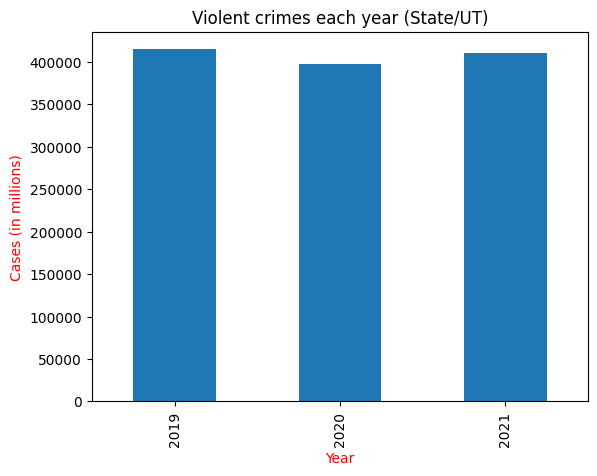

In [34]:
crimes_df = pd.Series([crimes_2019, crimes_2020, crimes_2021], ['2019', '2020', '2021'])

crimes_df.plot(kind='bar')

plt.xlabel("Year", color = "red")
plt.ylabel("Cases (in millions)", color = "red")
plt.title("Violent crimes each year (State/UT)")

plt.show()

> #### *****The number of violent crimes seems to be constant between 2019-2021, with 2020 showing a slight dip.*****

### States which have the highest violent crimes among all states

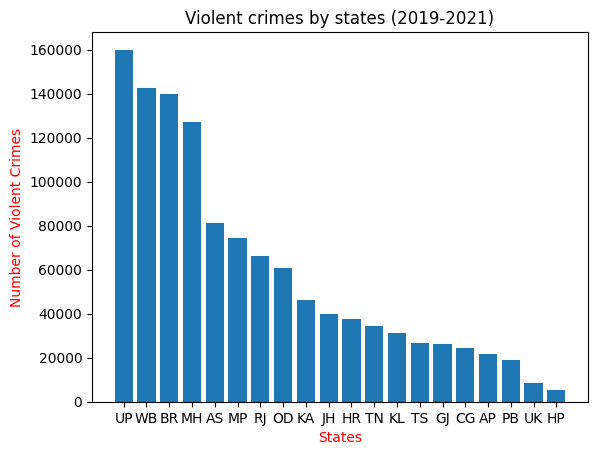

In [35]:
df['TotalViolentCrime'] = (df['2019'] + df['2020'] + df['2021'])
state = df[df['State/UT'] == "State"].sort_values(by = "TotalViolentCrime", ascending = False)
plt.bar(state['NameAbbr'][:20], state['TotalViolentCrime'][:20])
plt.xlabel("States", color = "red")
plt.ylabel("Number of Violent Crimes", color = "red")
plt.title("Violent crimes by states (2019-2021)")
plt.show()

> #### *****Uttar Pradesh, West Bengal, Bihar and Maharashtra are the top states which have the highest number of violent crimes between 2019-2021.*****

### UTs which have the highest violent crime rates among all UTs

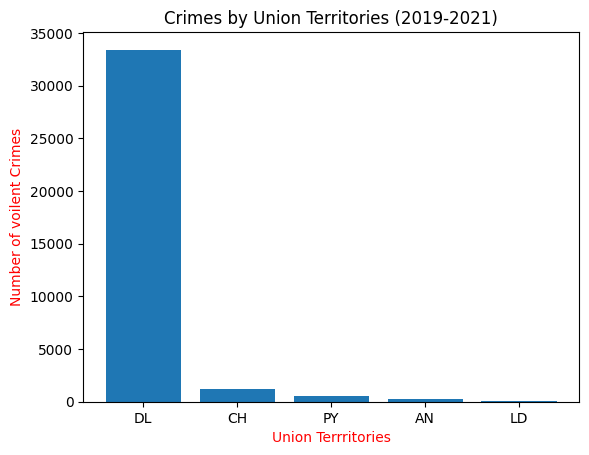

In [36]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalViolentCrime", ascending = False)
plt.bar(ut['NameAbbr'][:20], ut['TotalViolentCrime'][:20])
plt.xlabel("Union Terrritories", color = "red")
plt.ylabel("Number of voilent Crimes", color = "red")
plt.title("Crimes by Union Territories (2019-2021)")
plt.show()

> #### *****Delhi by far have the most number of violent crimes among Union territories.*****

### Violent crimes by top 10 states year by year

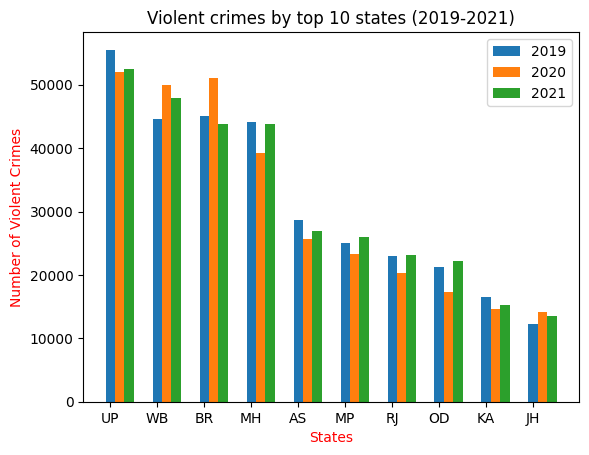

In [37]:
state = df[df['State/UT'] == "State"].sort_values(by = "TotalViolentCrime", ascending = False)

xpos = np.arange(len(state['NameAbbr'][:10]))
plt.xticks(xpos, state['NameAbbr'][:10])
plt.bar(xpos, state['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, state['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, state['2021'][:10], label = "2021", width = 0.2)

plt.xlabel("States", color = "red")
plt.ylabel("Number of Violent Crimes", color = "red")
plt.title("Violent crimes by top 10 states (2019-2021)")
plt.legend()
plt.show()

> #### *****West Bengal saw a spike of violent crimes from 2020 and Bihar saw a significant rise of violent crimes in the year 2020, while other have a fairly constant numbers in these three years.*****

### Violent crimes by top 10 UTs year by year

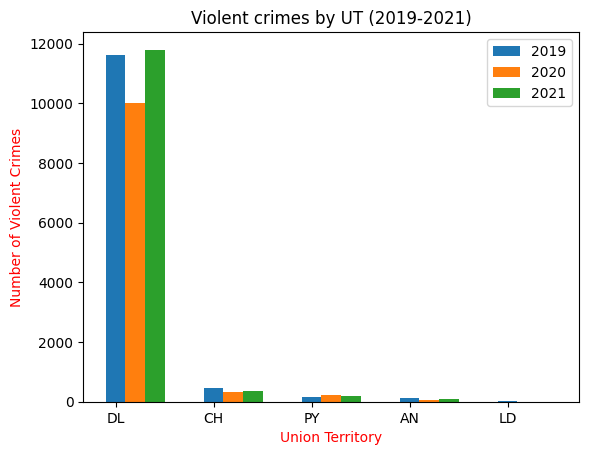

In [38]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalViolentCrime", ascending = False)

xpos = np.arange(len(ut['NameAbbr'][:10]))
plt.xticks(xpos, ut['NameAbbr'][:10])
plt.bar(xpos, ut['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, ut['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, ut['2021'][:10], label = "2021", width = 0.2)


plt.xlabel("Union Territory", color = "red")
plt.ylabel("Number of Violent Crimes", color = "red")
plt.title("Violent crimes by UT (2019-2021)")
plt.legend()
plt.show()

> #### *****Delhi saw a significant dip in the number of voilent crimes in the year 2020 but rising to the previous level next year.*****

### Violent crime rates of top 20 State/UT

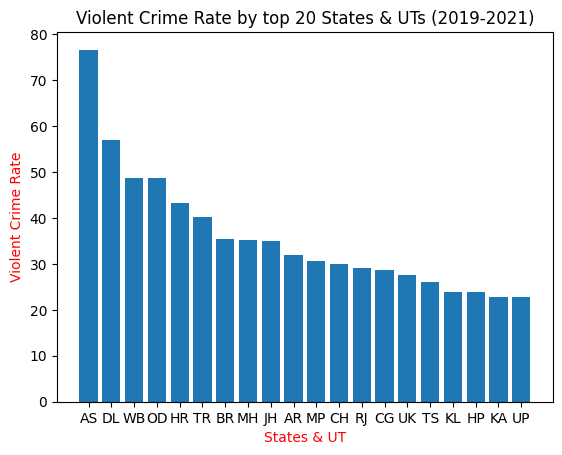

In [39]:
sort_by_vcr = df.sort_values(by = "RateofViolentCrimes", ascending = False)
plt.bar(sort_by_vcr['NameAbbr'][:20], sort_by_vcr['RateofViolentCrimes'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Violent Crime Rate", color = "red")
plt.title("Violent Crime Rate by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****Assam has the highest violent crime rate while Uttar Pradesh has the lowest violent crime rates among top 10 States/UT.*****

### Charge sheeting rate by top 10 states and UTs

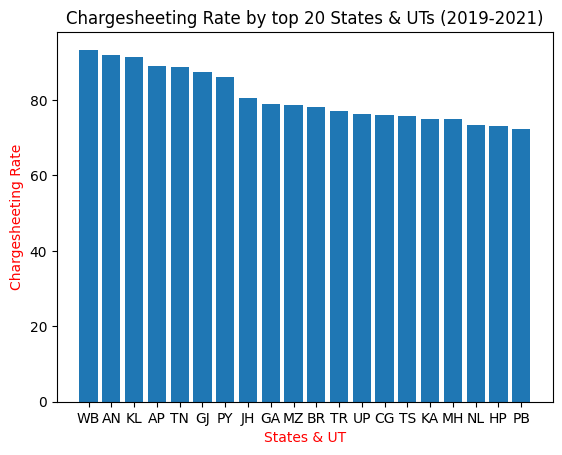

In [40]:
sort_by_charge_sheet_rate = df.sort_values(by = "ChargesSheetingRate", ascending = False)
plt.bar(sort_by_charge_sheet_rate['NameAbbr'][:20], sort_by_charge_sheet_rate['ChargesSheetingRate'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Chargesheeting Rate", color = "red")
plt.title("Chargesheeting Rate by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****West Bengal has the highest charge sheeting rate while Punjab has the lowest charge sheeting rates among top 10 States/UT.*****

# Kidnapping/Abduction (State-UT wise) analysis

In [41]:
df = pd.read_csv(kidnapping_abduction)
df['NameAbbr'] = df['Name'].map(state_abbr)

In [42]:
df = df.replace('-', np.nan).dropna()
df['2019'] = df['2019'].astype('int64')

### Total Kidnapping/Abduction cases of all States and UTs

In [43]:
crimes_2019 = df['2019'].sum()
crimes_2020 = df['2020'].sum()
crimes_2021 = df['2021'].sum()

In [44]:
total_crimes = crimes_2019 + crimes_2020 + crimes_2021

> #### *****Total number of Kidnapping/Abduction cases that ocuured between 2019-2021 among all States and UTs are: 288,702.*****

### Total Kidnapping/Abduction cases year wise

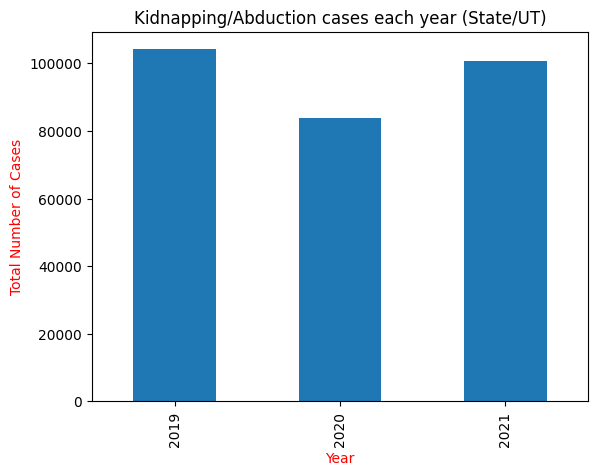

In [45]:
crimes_df = pd.Series([crimes_2019, crimes_2020, crimes_2021], ['2019', '2020', '2021'])

crimes_df.plot(kind='bar')

plt.xlabel("Year", color = "red")
plt.ylabel("Total Number of Cases", color = "red")
plt.title("Kidnapping/Abduction cases each year (State/UT)")

plt.show()

> #### *****2019 saw the highest number of Kidnapping/Abduction cases while 2020 saw the least.*****

### States which have the highest Kidnapping/Abduction cases among all states

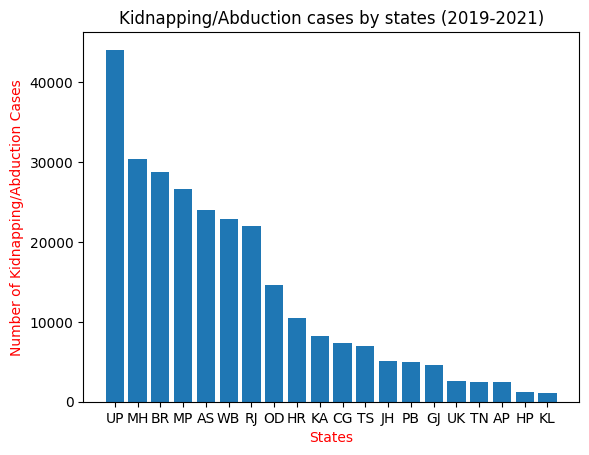

In [46]:
df['TotalKidnapping'] = (df['2019'] + df['2020'] + df['2021'])
state = df[df['State/UT'] == "State"].sort_values(by = "TotalKidnapping", ascending = False)
plt.bar(state['NameAbbr'][:20], state['TotalKidnapping'][:20])
plt.xlabel("States", color = "red")
plt.ylabel("Number of Kidnapping/Abduction Cases", color = "red")
plt.title("Kidnapping/Abduction cases by states (2019-2021)")
plt.show()

> #### *****Uttar Pradesh has the highest number of Kidnapping/Abduction cases by a significant margin while Kerala has the lowest among top 20 states.*****

### UTs which have the highest Kidnapping/Abduction cases among all UTs

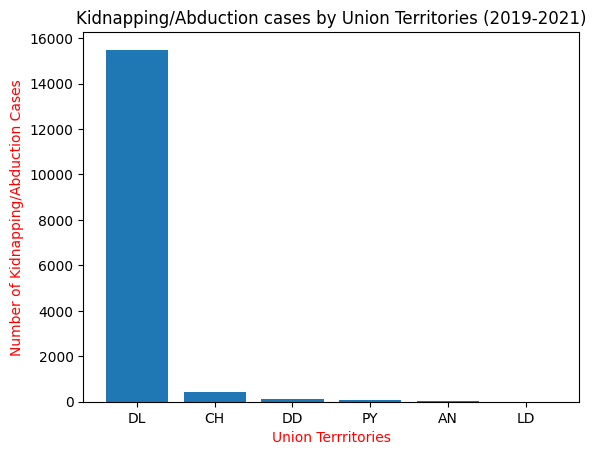

In [47]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalKidnapping", ascending = False)
plt.bar(ut['NameAbbr'][:20], ut['TotalKidnapping'][:20])
plt.xlabel("Union Terrritories", color = "red")
plt.ylabel("Number of Kidnapping/Abduction Cases", color = "red")
plt.title("Kidnapping/Abduction cases by Union Territories (2019-2021)")
plt.show()

> #### *****Among Union Territories, Delhi by far has the highest number of Kidnapping/Abduction cases.*****

### Kidnapping/Abduction cases by top 10 states year by year

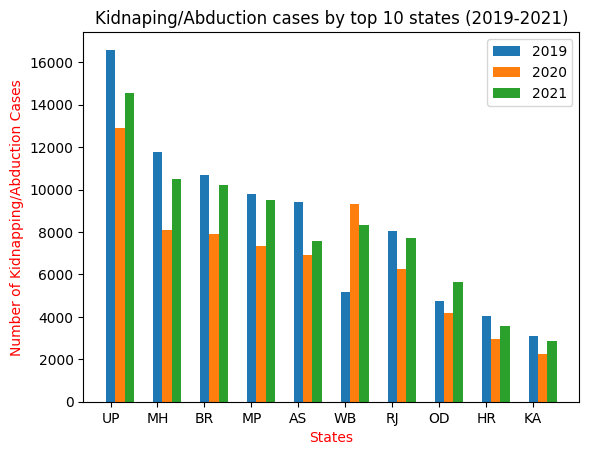

In [48]:
state = df[df['State/UT'] == "State"].sort_values(by = "TotalKidnapping", ascending = False)

xpos = np.arange(len(state['NameAbbr'][:10]))
plt.xticks(xpos, state['NameAbbr'][:10])
plt.bar(xpos, state['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, state['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, state['2021'][:10], label = "2021", width = 0.2)

plt.xlabel("States", color = "red")
plt.ylabel("Number of Kidnapping/Abduction Cases", color = "red")
plt.title("Kidnaping/Abduction cases by top 10 states (2019-2021)")
plt.legend()
plt.show()

> #### *****All the states saw a significant dip in Kidnapping/Abduction cases in 2020 while West Bengal saw a significant rise.*****

### Kidnapping/Abduction cases by top 10 UTs year by year

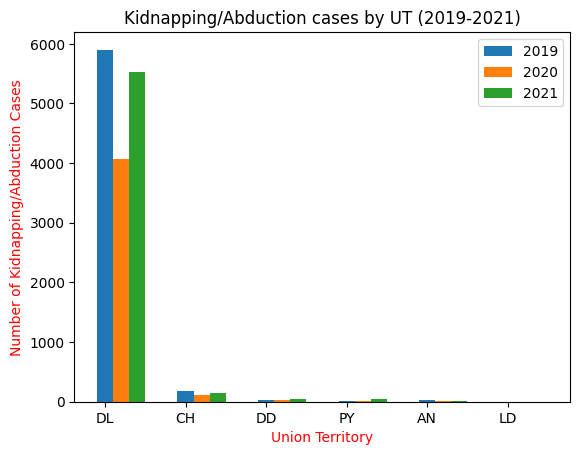

In [49]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalKidnapping", ascending = False)

xpos = np.arange(len(ut['NameAbbr'][:10]))
plt.xticks(xpos, ut['NameAbbr'][:10])
plt.bar(xpos, ut['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, ut['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, ut['2021'][:10], label = "2021", width = 0.2)


plt.xlabel("Union Territory", color = "red")
plt.ylabel("Number of Kidnapping/Abduction Cases", color = "red")
plt.title("Kidnapping/Abduction cases by UT (2019-2021)")
plt.legend()
plt.show()

> #### *****All the Union Territories saw a drop in Kidnapping/Abduction cases in 2020.*****

### Kidnapping/Abduction rates of top 20 State/UT

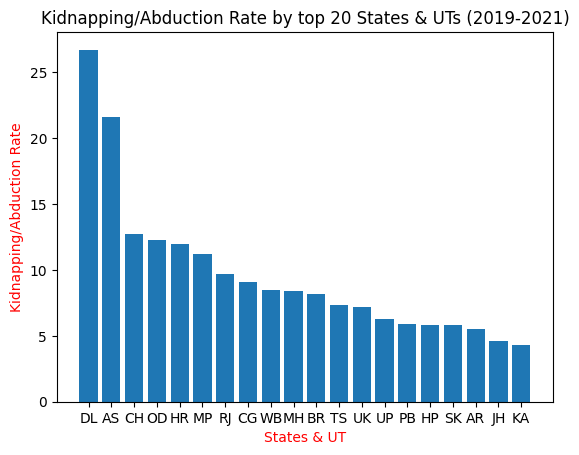

In [50]:
sort_by_kdn = df.sort_values(by = "RateofKidnappingAbduction", ascending = False)
plt.bar(sort_by_kdn['NameAbbr'][:20], sort_by_kdn['RateofKidnappingAbduction'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Kidnapping/Abduction Rate", color = "red")
plt.title("Kidnapping/Abduction Rate by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****Delhi and Assam are the top two places in terms of Kidnapping/Abduction rates by a large margin.*****

### Charge sheeting rate by top 10 states and UTs

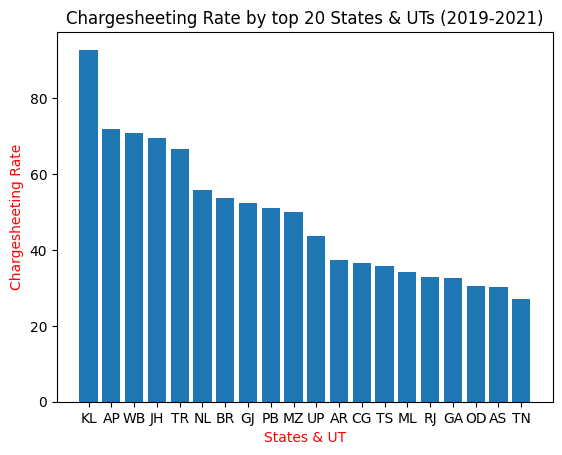

In [51]:
sort_by_charge_sheet_rate = df.sort_values(by = "ChargesSheetingRate", ascending = False)
plt.bar(sort_by_charge_sheet_rate['NameAbbr'][:20], sort_by_charge_sheet_rate['ChargesSheetingRate'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Chargesheeting Rate", color = "red")
plt.title("Chargesheeting Rate by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****Among top 20 States/UT, Kerala has the highest charge sheeting rate while Tamil Nadu has the lowest charge sheeting rate.*****

# Crime against women (State-UT wise) analysis

In [52]:
df = pd.read_csv(crime_agaist_women)
df['NameAbbr'] = df['Name'].map(state_abbr)

In [53]:
df = df.replace('-', np.nan).dropna()
df['2019'] = df['2019'].astype('int64')

### Total crime against women of all States and UTs

In [54]:
crimes_2019 = df['2019'].sum()
crimes_2020 = df['2020'].sum()
crimes_2021 = df['2021'].sum()

In [55]:
total_crimes = crimes_2019 + crimes_2020 + crimes_2021

> #### *****Total number of crimes against women that ocuured between 2019-2021 among all States and UTs are: 1,194,669.*****

### Total crime against women year wise

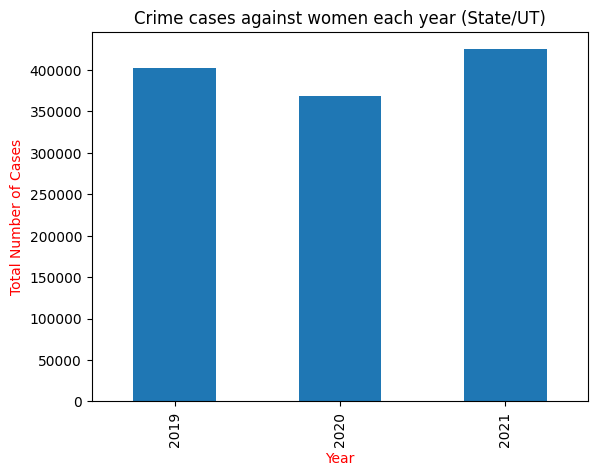

In [56]:
crimes_df = pd.Series([crimes_2019, crimes_2020, crimes_2021], ['2019', '2020', '2021'])

crimes_df.plot(kind='bar')

plt.xlabel("Year", color = "red")
plt.ylabel("Total Number of Cases", color = "red")
plt.title("Crime cases against women each year (State/UT)")

plt.show()

> #### *****Total crimes against women dropped in 2020 but rose to the previous level in 2021.*****

### States which have the highest crime cases against women among all states

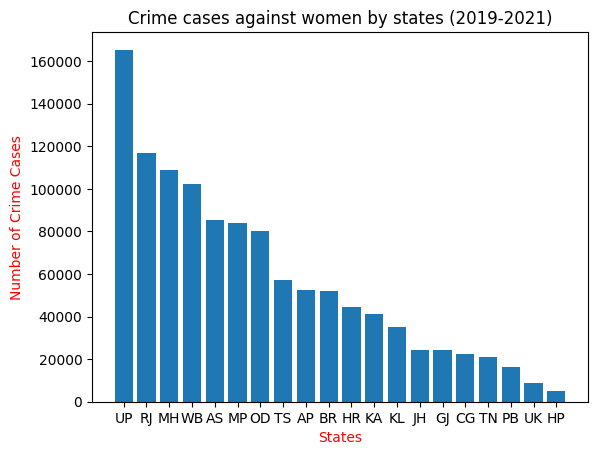

In [57]:
df['TotalCrime'] = (df['2019'] + df['2020'] + df['2021'])
state = df[df['State/UT'] == "State"].sort_values(by = "TotalCrime", ascending = False)
plt.bar(state['NameAbbr'][:20], state['TotalCrime'][:20])
plt.xlabel("States", color = "red")
plt.ylabel("Number of Crime Cases", color = "red")
plt.title("Crime cases against women by states (2019-2021)")
plt.show()

> #### *****Uttar Pradesh,Rajasthan, Maharashtra had the highest cases of crime against women between 2019-2021 while Himachal Pradesh had the least among top 20 States.*****

### UTs which have the highest cases of crime against women among all UTs

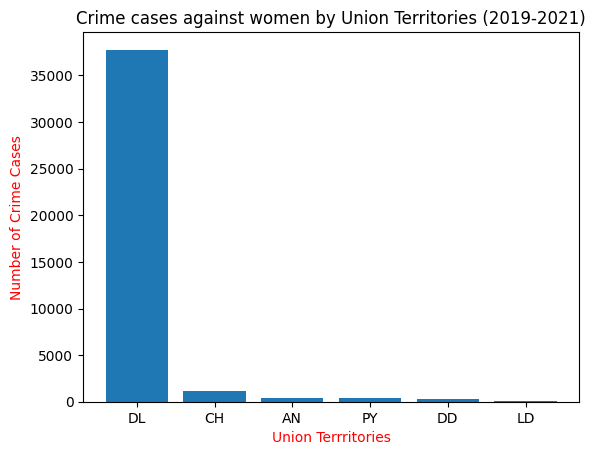

In [58]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalCrime", ascending = False)
plt.bar(ut['NameAbbr'][:20], ut['TotalCrime'][:20])
plt.xlabel("Union Terrritories", color = "red")
plt.ylabel("Number of Crime Cases", color = "red")
plt.title("Crime cases against women by Union Territories (2019-2021)")
plt.show()

> #### *****Delhi by far has the highest number of crime cases against women, followed by Jammu & Kashmir while Lakshadweep has the least among UTs*****

### Crime cases against women by top 10 states year by year

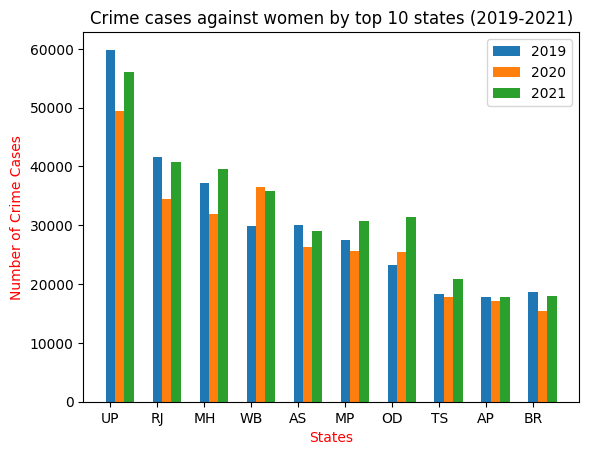

In [59]:
state = df[df['State/UT'] == "State"].sort_values(by = "TotalCrime", ascending = False)

xpos = np.arange(len(state['NameAbbr'][:10]))
plt.xticks(xpos, state['NameAbbr'][:10])
plt.bar(xpos, state['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, state['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, state['2021'][:10], label = "2021", width = 0.2)

plt.xlabel("States", color = "red")
plt.ylabel("Number of Crime Cases", color = "red")
plt.title("Crime cases against women by top 10 states (2019-2021)")
plt.legend()
plt.show()

> #### *****Except West Bengal and Odisa, all the other states among top 10 saw a decrease in crime cases against women in 2020.*****

### Crime cases agaianst women by top 10 UTs year by year

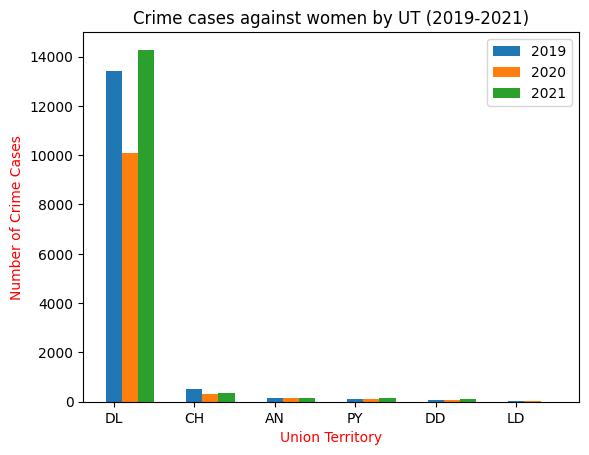

In [60]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalCrime", ascending = False)

xpos = np.arange(len(ut['NameAbbr'][:10]))
plt.xticks(xpos, ut['NameAbbr'][:10])
plt.bar(xpos, ut['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, ut['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, ut['2021'][:10], label = "2021", width = 0.2)


plt.xlabel("Union Territory", color = "red")
plt.ylabel("Number of Crime Cases", color = "red")
plt.title("Crime cases against women by UT (2019-2021)")
plt.legend()
plt.show()

> #### *****Delhi saw a significant drop in number of crime cases against women in 2020 only to increase in 2021.*****

### Rate of crime against women among top 20 State/UT

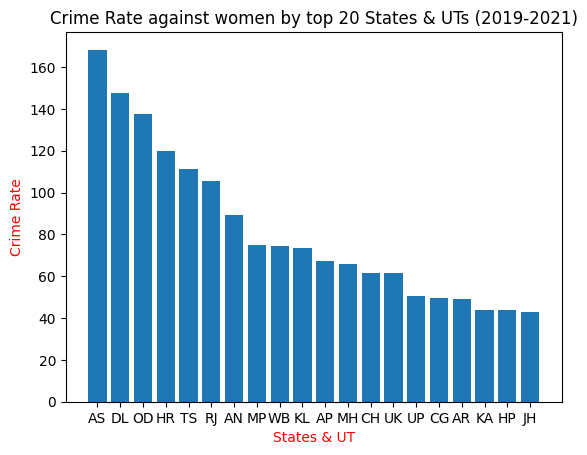

In [61]:
sort_by_caw = df.sort_values(by = "RateofCrimeAgainstWomen", ascending = False)
plt.bar(sort_by_caw['NameAbbr'][:20], sort_by_caw['RateofCrimeAgainstWomen'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Crime Rate", color = "red")
plt.title("Crime Rate against women by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****Assam has the highest rate of crime against women while Jharkhand has the least betwnn 2019-2021 among top 20 states.*****

### Charge sheeting rate by top 10 states and UTs

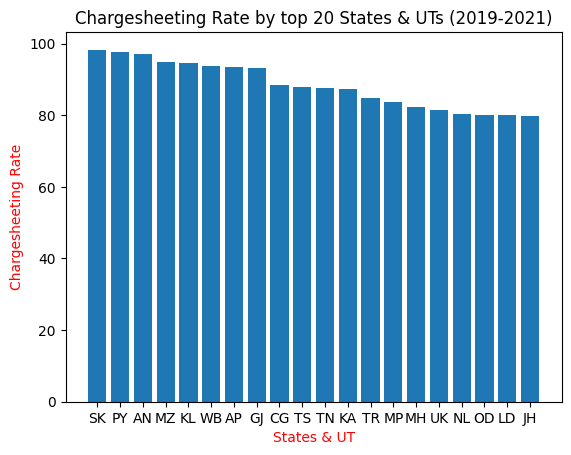

In [62]:
sort_by_charge_sheet_rate = df.sort_values(by = "ChargesSheetingRate", ascending = False)
plt.bar(sort_by_charge_sheet_rate['NameAbbr'][:20], sort_by_charge_sheet_rate['ChargesSheetingRate'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Chargesheeting Rate", color = "red")
plt.title("Chargesheeting Rate by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****Sikkim has the highest and Jharkhand has the lowest charge sheeting rate respectively among top 20 States/UT.*****

# Crime against children (State-UT wise) analysis

In [63]:
df = pd.read_csv(crime_against_children)
df['NameAbbr'] = df['Name'].map(state_abbr)

In [64]:
df = df.replace('-', np.nan).dropna()
df['2019'] = df['2019'].astype('int64')

### Total crime against children of all States and UTs

In [65]:
crimes_2019 = df['2019'].sum()
crimes_2020 = df['2020'].sum()
crimes_2021 = df['2021'].sum()

In [66]:
total_crimes = crimes_2019 + crimes_2020 + crimes_2021

> #### *****Total number of crimes against children that ocuured between 2019-2021 among all States and UTs are: 426,022.*****

### Total crime against children year wise

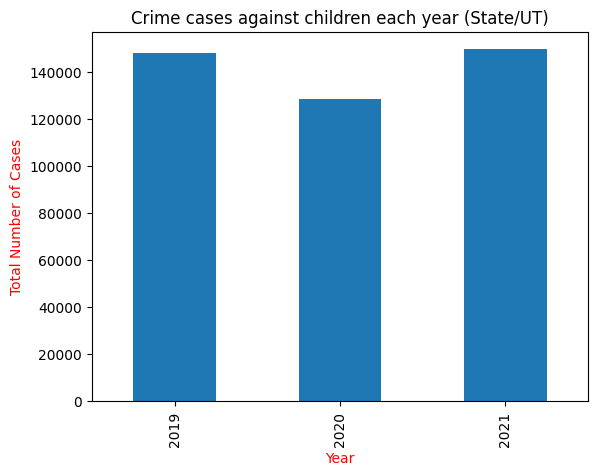

In [67]:
crimes_df = pd.Series([crimes_2019, crimes_2020, crimes_2021], ['2019', '2020', '2021'])

crimes_df.plot(kind='bar')

plt.xlabel("Year", color = "red")
plt.ylabel("Total Number of Cases", color = "red")
plt.title("Crime cases against children each year (State/UT)")

plt.show()

> #### *****Crime cases against children dropped in 2020.*****

### States which have the highest crime cases against children among all states

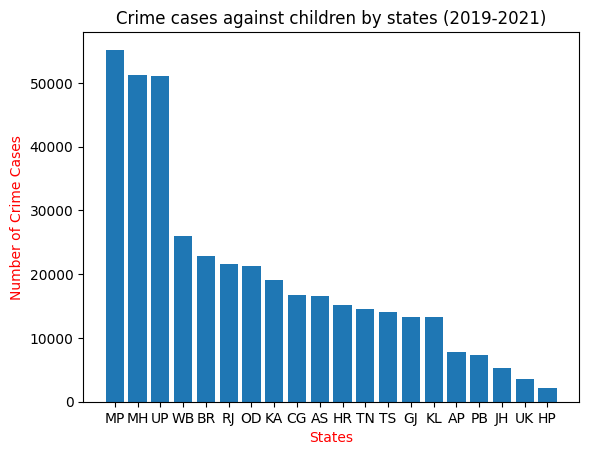

In [68]:
df['TotalCrime'] = (df['2019'] + df['2020'] + df['2021'])
state = df[df['State/UT'] == "State"].sort_values(by = "TotalCrime", ascending = False)
plt.bar(state['NameAbbr'][:20], state['TotalCrime'][:20])
plt.xlabel("States", color = "red")
plt.ylabel("Number of Crime Cases", color = "red")
plt.title("Crime cases against children by states (2019-2021)")
plt.show()

> #### *****Madhya Pradesh, Maharashtra and Uttar Pradesh are top three states in terms of number of crimes against children between 2019-2021 by a long margin.*****

### UTs which have the highest cases of crime against chilldren among all UTs

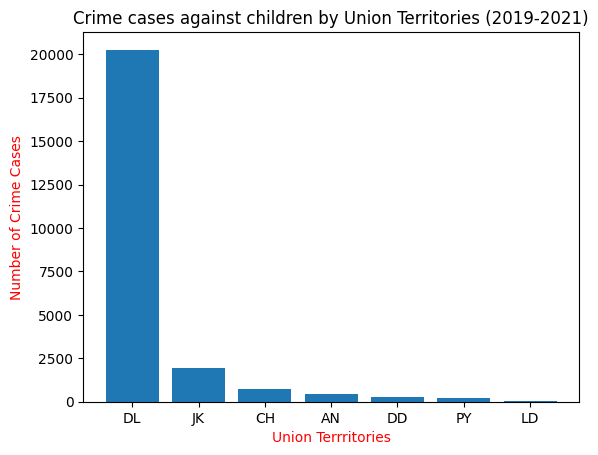

In [69]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalCrime", ascending = False)
plt.bar(ut['NameAbbr'][:20], ut['TotalCrime'][:20])
plt.xlabel("Union Terrritories", color = "red")
plt.ylabel("Number of Crime Cases", color = "red")
plt.title("Crime cases against children by Union Territories (2019-2021)")
plt.show()

> #### *****Delhi by far has the most number of crimes against children among UTs*****

### Crime cases against children by top 10 states year by year

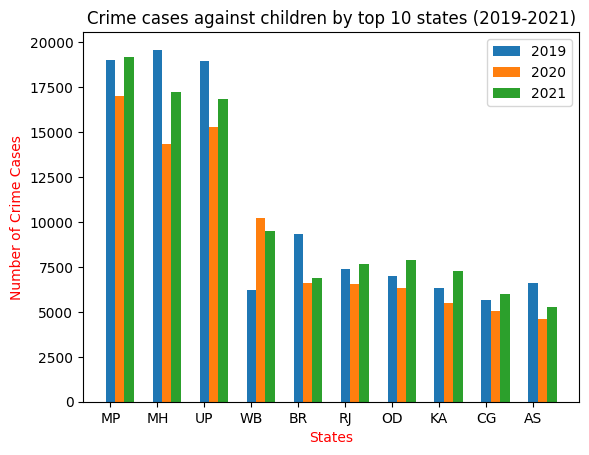

In [70]:
state = df[df['State/UT'] == "State"].sort_values(by = "TotalCrime", ascending = False)

xpos = np.arange(len(state['NameAbbr'][:10]))
plt.xticks(xpos, state['NameAbbr'][:10])
plt.bar(xpos, state['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, state['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, state['2021'][:10], label = "2021", width = 0.2)

plt.xlabel("States", color = "red")
plt.ylabel("Number of Crime Cases", color = "red")
plt.title("Crime cases against children by top 10 states (2019-2021)")
plt.legend()
plt.show()

> #### *****Except West Bengal, crimes against children dropped in 2020 for other states.*****

### Crime cases against children by top UTs year by year

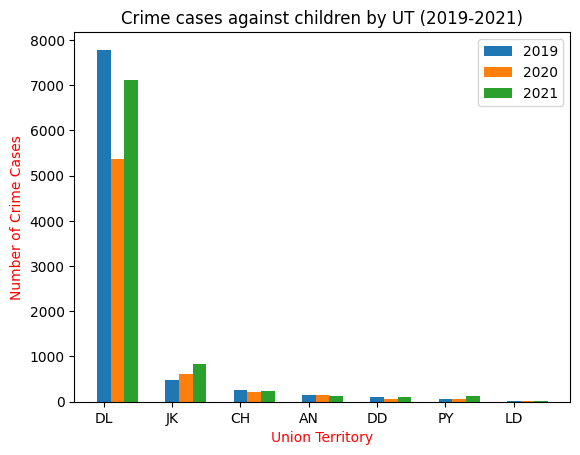

In [71]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalCrime", ascending = False)

xpos = np.arange(len(ut['NameAbbr'][:10]))
plt.xticks(xpos, ut['NameAbbr'][:10])
plt.bar(xpos, ut['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, ut['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, ut['2021'][:10], label = "2021", width = 0.2)


plt.xlabel("Union Territory", color = "red")
plt.ylabel("Number of Crime Cases", color = "red")
plt.title("Crime cases against children by UT (2019-2021)")
plt.legend()
plt.show()

### Rate of crime against children among top 20 State/UT

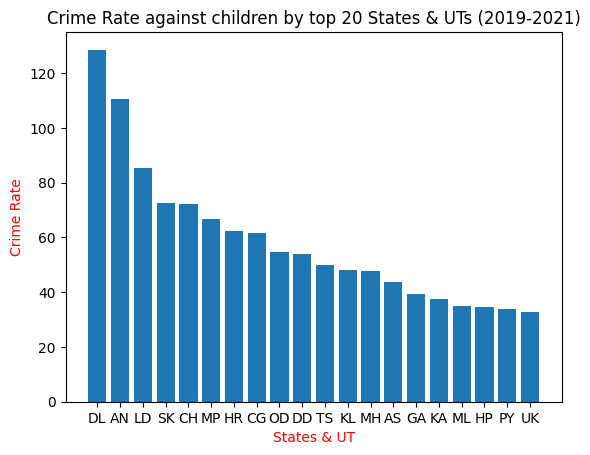

In [72]:
sort_by_cac = df.sort_values(by = "RateofCrimeAgainstChildren", ascending = False)
plt.bar(sort_by_cac['NameAbbr'][:20], sort_by_cac['RateofCrimeAgainstChildren'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Crime Rate", color = "red")
plt.title("Crime Rate against children by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****Delhi has the highest crime rate against children while Uttarakhand has the lowest among top 20 States/UT.*****

### Charge sheeting rate by top 10 states and UTs

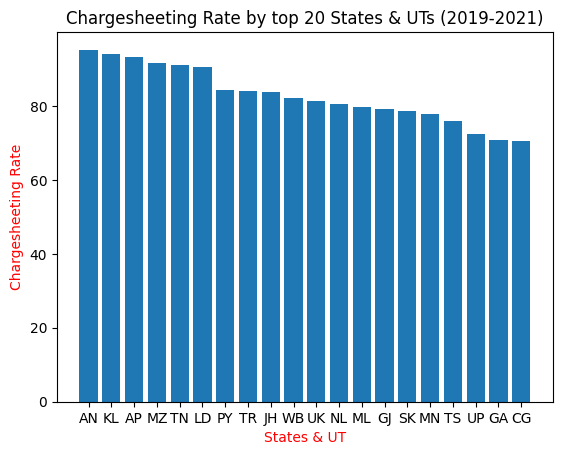

In [73]:
sort_by_charge_sheet_rate = df.sort_values(by = "ChargesSheetingRate", ascending = False)
plt.bar(sort_by_charge_sheet_rate['NameAbbr'][:20], sort_by_charge_sheet_rate['ChargesSheetingRate'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Chargesheeting Rate", color = "red")
plt.title("Chargesheeting Rate by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****Andaman & Nicobar Island has the highest charge sheeting rate and Chattisgarh has the lowest among top 20 States/UT.*****

# Murder Cases (State-UT wise) analysis

In [74]:
df = pd.read_csv(murder_cases)
df['NameAbbr'] = df['Name'].map(state_abbr)

In [75]:
df = df.replace('-', np.nan).dropna()
df['2019'] = df['2019'].astype('int64')

### Total murder cases of all States and UTs

In [76]:
crimes_2019 = df['2019'].sum()
crimes_2020 = df['2020'].sum()
crimes_2021 = df['2021'].sum()

In [77]:
total_crimes = crimes_2019 + crimes_2020 + crimes_2021

> #### *****Total number of murder cases that ocuured between 2019-2021 among all States and UTs are: 87,374.*****

### Total murder cases year wise

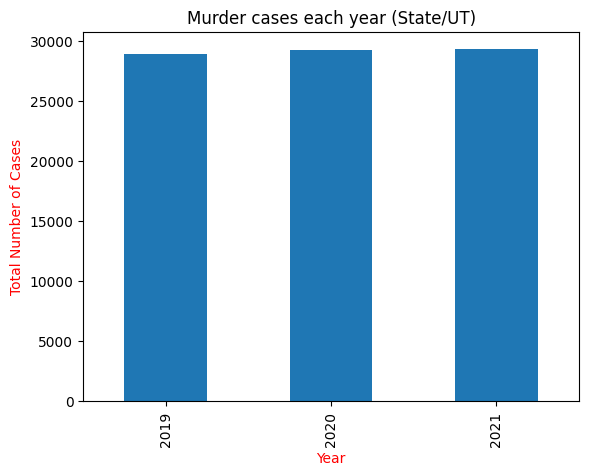

In [78]:
crimes_df = pd.Series([crimes_2019, crimes_2020, crimes_2021], ['2019', '2020', '2021'])

crimes_df.plot(kind='bar')

plt.xlabel("Year", color = "red")
plt.ylabel("Total Number of Cases", color = "red")
plt.title("Murder cases each year (State/UT)")

plt.show()

> #### *****The number of murder cases throughout 2019-2020 remained constant.*****

### States which have the highest murder cases among all states

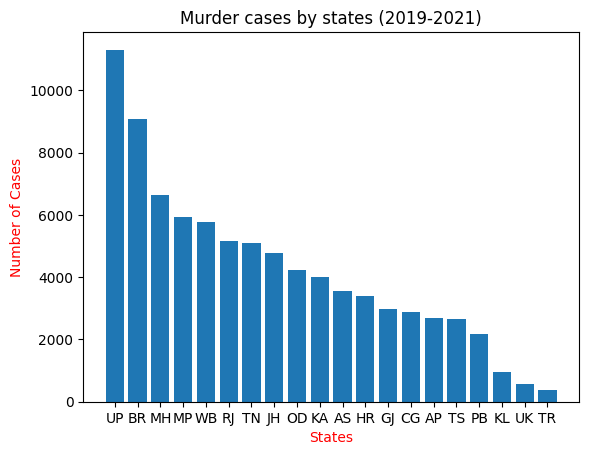

In [79]:
df['TotalMurders'] = (df['2019'] + df['2020'] + df['2021'])
state = df[df['State/UT'] == "State"].sort_values(by = "TotalMurders", ascending = False)
plt.bar(state['NameAbbr'][:20], state['TotalMurders'][:20])
plt.xlabel("States", color = "red")
plt.ylabel("Number of Cases", color = "red")
plt.title("Murder cases by states (2019-2021)")
plt.show()

> #### *****Uttar Pradesh and Bihar has the highest number of murder cases between 2019-2021.*****

### UTs which have the highest murder cases among all UTs

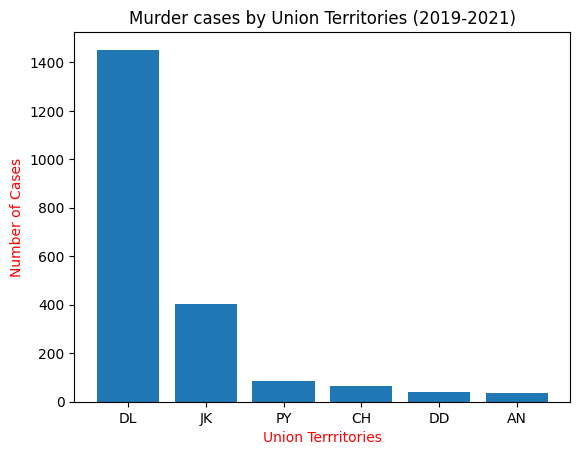

In [80]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalMurders", ascending = False)
plt.bar(ut['NameAbbr'][:20], ut['TotalMurders'][:20])
plt.xlabel("Union Terrritories", color = "red")
plt.ylabel("Number of Cases", color = "red")
plt.title("Murder cases by Union Territories (2019-2021)")
plt.show()

> #### *****Delhi by far has the highest number of mureder cases followed by Jammu & Kashmir.*****

### Murder cases by top 10 states year by year

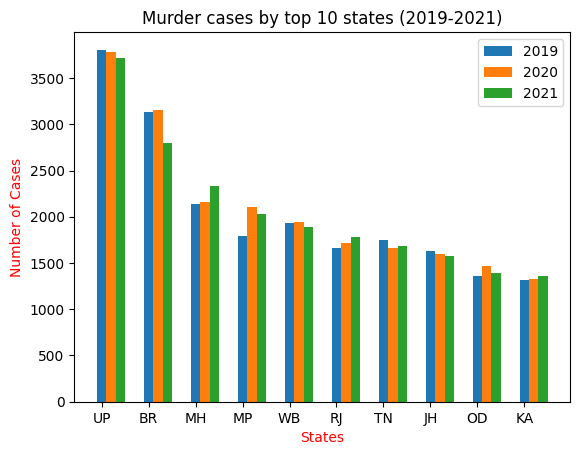

In [81]:
state = df[df['State/UT'] == "State"].sort_values(by = "TotalMurders", ascending = False)

xpos = np.arange(len(state['NameAbbr'][:10]))
plt.xticks(xpos, state['NameAbbr'][:10])
plt.bar(xpos, state['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, state['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, state['2021'][:10], label = "2021", width = 0.2)

plt.xlabel("States", color = "red")
plt.ylabel("Number of Cases", color = "red")
plt.title("Murder cases by top 10 states (2019-2021)")
plt.legend()
plt.show()

### Murder cases by top UTs year by year

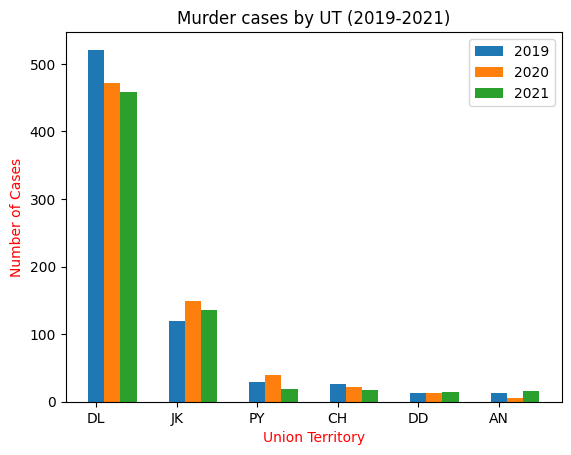

In [82]:
ut = df[df['State/UT'] == "UT"].sort_values(by = "TotalMurders", ascending = False)

xpos = np.arange(len(ut['NameAbbr'][:10]))
plt.xticks(xpos, ut['NameAbbr'][:10])
plt.bar(xpos, ut['2019'][:10], label = "2019", width = 0.2)
plt.bar(xpos + 0.2, ut['2020'][:10], label = "2020", width = 0.2)
plt.bar(xpos + 0.4, ut['2021'][:10], label = "2021", width = 0.2)


plt.xlabel("Union Territory", color = "red")
plt.ylabel("Number of Cases", color = "red")
plt.title("Murder cases by UT (2019-2021)")
plt.legend()
plt.show()

### Rate of murder among top 20 State/UT

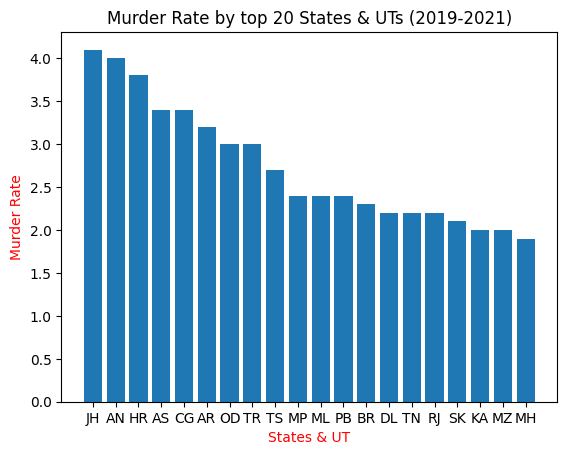

In [83]:
sort_by_mr = df.sort_values(by = "RateofMurder", ascending = False)
plt.bar(sort_by_mr['NameAbbr'][:20], sort_by_mr['RateofMurder'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Murder Rate", color = "red")
plt.title("Murder Rate by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****Jharkhand, Andaman & Nicobar Island and Haryana ranks top three in terms of rate of murder among top 20 States/UT.*****

### Charge sheeting rate by top 10 states and UTs

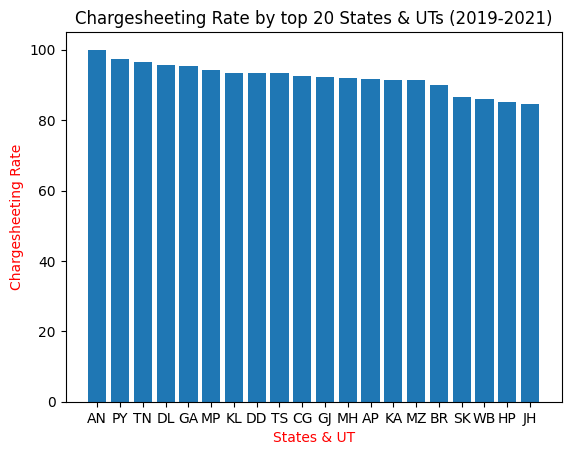

In [84]:
df['ChargesSheetingRate'] = df['ChargesSheetingRate'].astype('float64')
sort_by_charge_sheet_rate = df.sort_values(by = "ChargesSheetingRate", ascending = False)
plt.bar(sort_by_charge_sheet_rate['NameAbbr'][:20], sort_by_charge_sheet_rate['ChargesSheetingRate'][:20])
plt.xlabel("States & UT", color = "red")
plt.ylabel("Chargesheeting Rate", color = "red")
plt.title("Chargesheeting Rate by top 20 States & UTs (2019-2021)")
plt.show()

> #### *****Andaman & Nicobar Island has the highest charge sheeting rate while Jharkhand has the lowest.*****

# Victims of murder (Gender-Age wise) analysis

In [85]:
df = pd.read_csv(victims_of_murder)
df['NameAbbr'] = df['Name'].map(state_abbr)

In [86]:
df['Age'] = df['Age'].replace(['TotalChild', 'TotalAdult'], ['<6', '>60'])

### Total number of victims accross all age group by region

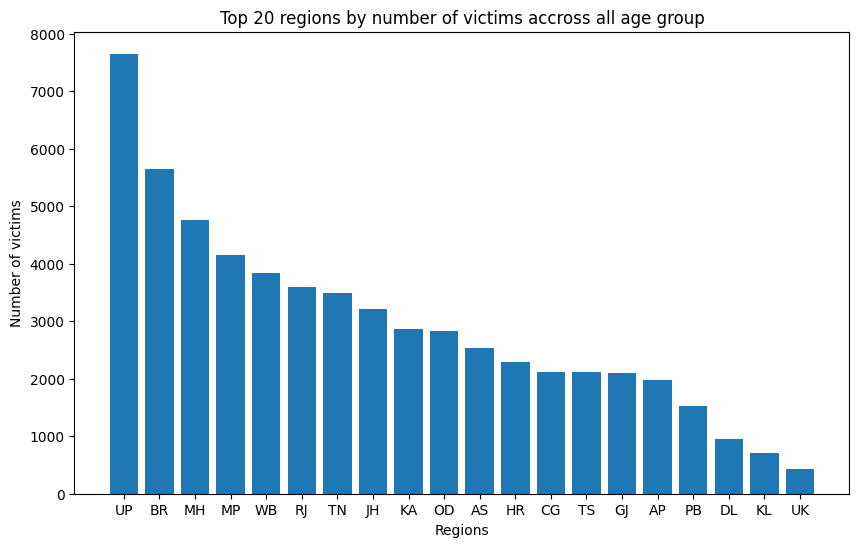

In [87]:
totals = df.groupby('NameAbbr')['Total'].sum()
totals = totals.sort_values(ascending = False)
plt.figure(figsize=(10, 6))
plt.bar(totals.index[:20], totals.values[:20])
plt.xlabel("Regions")
plt.ylabel("Number of victims")
plt.title("Top 20 regions by number of victims accross all age group")
plt.show()

> #### *****Among top 20 regions of the country, Uttar Pradesh has the highest number of victims and Uttarakhand has the least.*****

### Gender types of victims of top 20 regions

/tmp/ipykernel_20/2140060896.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender_totals = df.groupby('NameAbbr')['Male', 'Female', 'Trans'].sum()


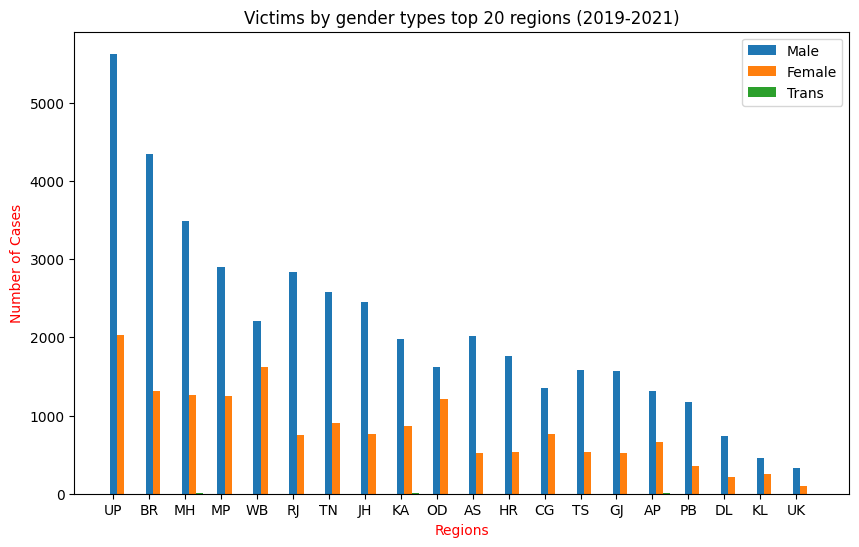

In [88]:
gender_totals = df.groupby('NameAbbr')['Male', 'Female', 'Trans'].sum()
gender_totals['Total'] = gender_totals['Male'] + gender_totals['Female'] + gender_totals['Trans']

gender_totals = gender_totals.sort_values(by = "Total", ascending = False)

xpos = np.arange(len(gender_totals.index[:20]))
plt.figure(figsize=(10, 6))
plt.xticks(xpos, gender_totals.index[:20])
plt.bar(xpos, gender_totals['Male'][:20], label = "Male", width = 0.2)
plt.bar(xpos + 0.2, gender_totals['Female'][:20], label = "Female", width = 0.2)
plt.bar(xpos + 0.4, gender_totals['Trans'][:20], label = "Trans", width = 0.2)

plt.xlabel("Regions", color = "red")
plt.ylabel("Number of Cases", color = "red")
plt.title("Victims by gender types top 20 regions (2019-2021)")
plt.legend()
plt.show()

> #### *****In all the regions among top 10, males were the most victims of murders.*****

### Age wise murder victims of top 10 regions

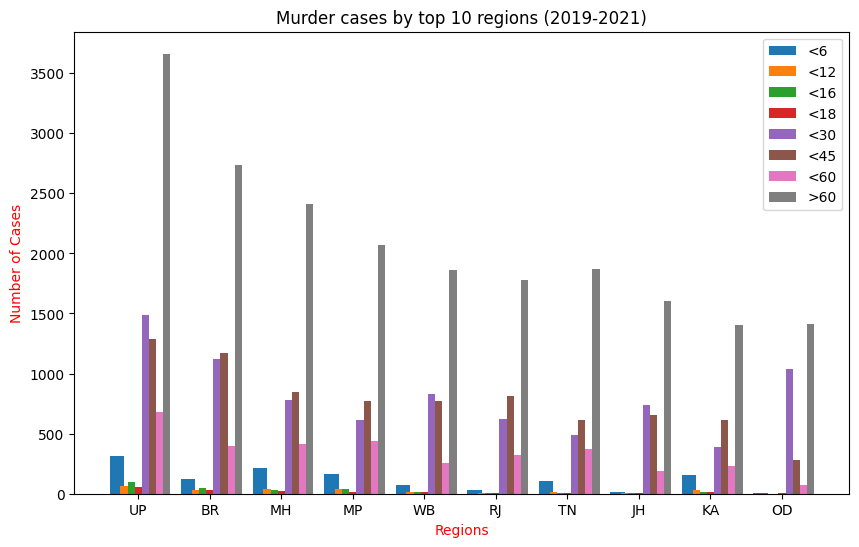

Age,<12,<16,<18,<30,<45,<6,<60,>60,Total
NameAbbr,,,,,,,,,
UP,67,97,58,1486,1289,310,681,3662,7650
BR,28,47,29,1118,1174,122,396,2738,5652
MH,38,30,21,781,848,215,414,2415,4762
MP,36,39,18,617,771,161,438,2070,4150
WB,15,14,14,831,773,73,253,1865,3838
RJ,7,8,5,622,812,32,323,1777,3586
TN,17,5,9,489,611,107,370,1874,3482
JH,2,4,6,742,657,12,189,1600,3212
KA,29,16,16,391,611,155,232,1408,2858


In [89]:
age_group_totals = df.groupby(['NameAbbr', 'Age'])['Total'].sum().unstack()
age_group_totals['Total'] = age_group_totals['<12'] + age_group_totals['<16'] + age_group_totals['<18'] + age_group_totals['<30'] + age_group_totals['<45'] + age_group_totals['<6'] + age_group_totals['<60'] + age_group_totals['>60']
age_group_totals = age_group_totals.sort_values(by = "Total", ascending = False)
age_group_totals = pd.DataFrame(age_group_totals)

xpos = np.arange(len(age_group_totals[:10]))
plt.figure(figsize=(10, 6))

plt.xticks(xpos + 0.3, age_group_totals.index[:10])
plt.bar(xpos, age_group_totals['<6'][:10], label = "<6", width = 0.2)
plt.bar(xpos + 0.1, age_group_totals['<12'][:10], label = "<12", width = 0.1)
plt.bar(xpos + 0.2, age_group_totals['<16'][:10], label = "<16", width = 0.1)
plt.bar(xpos + 0.3, age_group_totals['<18'][:10], label = "<18", width = 0.1)
plt.bar(xpos + 0.4, age_group_totals['<30'][:10], label = "<30", width = 0.1)
plt.bar(xpos + 0.5, age_group_totals['<45'][:10], label = "<45", width = 0.1)
plt.bar(xpos + 0.6, age_group_totals['<60'][:10], label = "<60", width = 0.1)
plt.bar(xpos + 0.7, age_group_totals['>60'][:10], label = ">60", width = 0.1)

plt.xlabel("Regions", color = "red")
plt.ylabel("Number of Cases", color = "red")
plt.title("Murder cases by top 10 regions (2019-2021)")
plt.legend()
plt.show()

age_group_totals[:10]

### Victims of Murders by age group

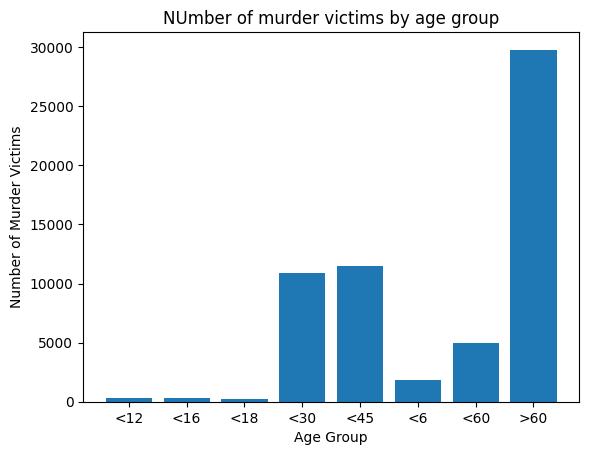

In [90]:
by_age_group = age_group_totals.drop('Total', axis = 1)
plt.bar(by_age_group.sum().index, by_age_group.sum().values)
plt.xlabel("Age Group")
plt.ylabel("Number of Murder Victims")
plt.title("NUmber of murder victims by age group")
plt.show()

> #### *****Persons with ages >60 has been the most victims of muder followed by persons of ages < 45 and <30.*****